In [1]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score 
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from yellowbrick.model_selection import LearningCurve
from sklearn.model_selection import RandomizedSearchCV
from yellowbrick.model_selection import ValidationCurve

In [2]:
Data=pd.read_csv('Result_dataset_130.csv')

In [3]:
features = Data.columns[0:13]
target = Data.columns[13:17]
Head = Data.columns[14]
Chest_deflection =  Data.columns[13]
Head_acceleration = Data.columns[15]
neck_force = Data.columns[16]
col = Data.columns
cv = KFold(n_splits=10)

# Random Hyperparameter Grid

In [4]:
X = Data[features]
y = Data[Head]

In [88]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# N estimators

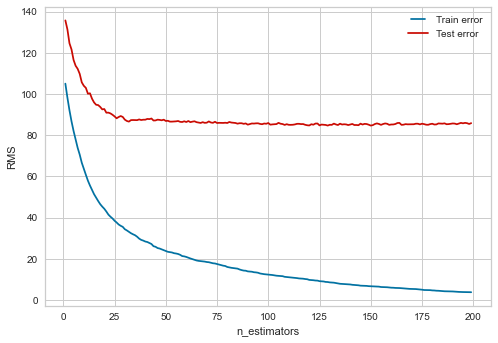

In [89]:
n_estimators = np.arange(1,200,1)
train_results = []
test_results = []
for eta in n_estimators:
    model = GradientBoostingRegressor(n_estimators=eta)
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    ax=mean_squared_error(y_train, train_pred,squared=False)
    train_results.append(ax)
    y_pred = model.predict(x_test)
    ax=mean_squared_error(y_test, y_pred,squared=False)
    test_results.append(ax)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label="Train error")
line2, = plt.plot(n_estimators, test_results, 'r', label="Test error")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMS')
plt.xlabel('n_estimators')
plt.show()


# Learning rate

In [90]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

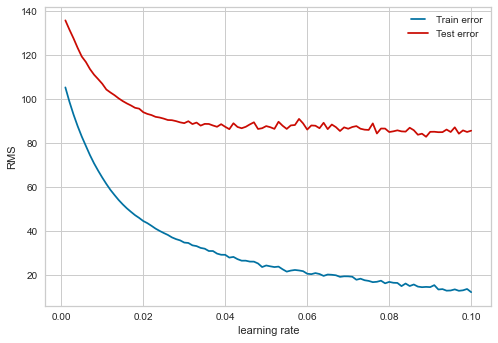

In [91]:
learning_rates = np.linspace(0.001,0.1,100)
train_results = []
test_results = []
for eta in learning_rates:
    model = GradientBoostingRegressor(learning_rate=eta)
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    ax=mean_squared_error(y_train, train_pred,squared=False)
    train_results.append(ax)
    y_pred = model.predict(x_test)
    ax=mean_squared_error(y_test, y_pred,squared=False)
    test_results.append(ax)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label="Train error")
line2, = plt.plot(learning_rates, test_results, 'r', label="Test error")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMS')
plt.xlabel('learning rate')
plt.show()


# Max_depth

In [92]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

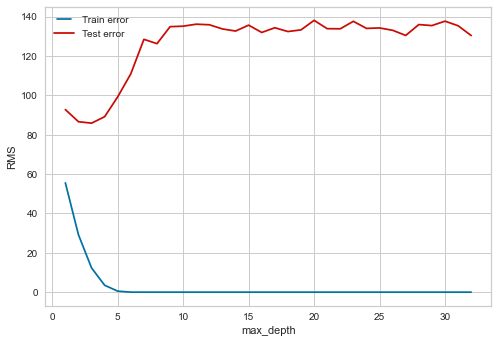

In [93]:
learning_rates = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for eta in learning_rates:
    model = GradientBoostingRegressor(max_depth=eta)
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    ax=mean_squared_error(y_train, train_pred,squared=False)
    train_results.append(ax)
    y_pred = model.predict(x_test)
    ax=mean_squared_error(y_test, y_pred,squared=False)
    test_results.append(ax)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label="Train error")
line2, = plt.plot(learning_rates, test_results, 'r', label="Test error")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMS')
plt.xlabel('max_depth')
plt.show()

# min_samples_split

In [94]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

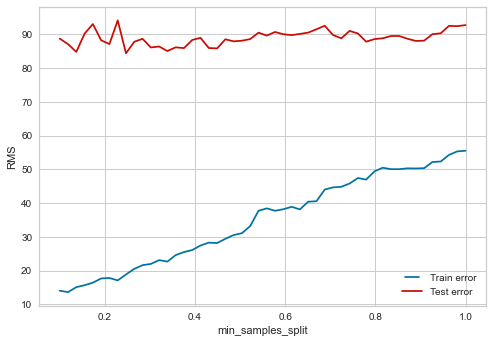

In [95]:
learning_rates = np.linspace(0.1, 1.0, 50, endpoint=True)
train_results = []
test_results = []
for eta in learning_rates:
    model = GradientBoostingRegressor(min_samples_split=eta)
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    ax=mean_squared_error(y_train, train_pred,squared=False)
    train_results.append(ax)
    y_pred = model.predict(x_test)
    ax=mean_squared_error(y_test, y_pred,squared=False)
    test_results.append(ax)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label="Train error")
line2, = plt.plot(learning_rates, test_results, 'r', label="Test error")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMS')
plt.xlabel('min_samples_split')
plt.show()

## min_samples_leaf

In [96]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

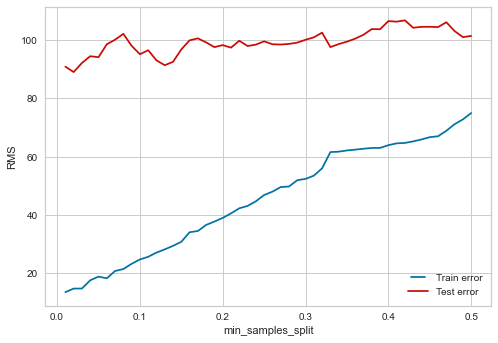

In [97]:
learning_rates = np.linspace(0.01, 0.5, 50, endpoint=True)
train_results = []
test_results = []
for eta in learning_rates:
    model = GradientBoostingRegressor(min_samples_leaf=eta)
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    ax=mean_squared_error(y_train, train_pred,squared=False)
    train_results.append(ax)
    y_pred = model.predict(x_test)
    ax=mean_squared_error(y_test, y_pred,squared=False)
    test_results.append(ax)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label="Train error")
line2, = plt.plot(learning_rates, test_results, 'r', label="Test error")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMS')
plt.xlabel('min_samples_split')
plt.show()

# max features

In [98]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

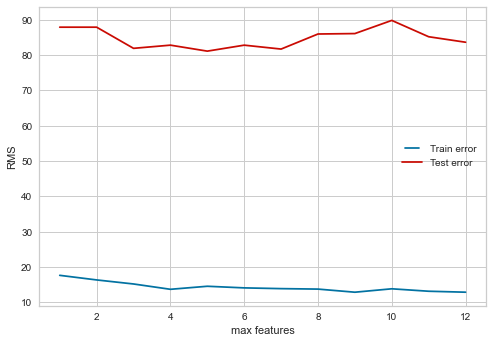

In [99]:
learning_rates = list(range(1,x_train.shape[1]))
train_results = []
test_results = []
for eta in learning_rates:
    model = GradientBoostingRegressor(max_features=eta)
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    ax=mean_squared_error(y_train, train_pred,squared=False)
    train_results.append(ax)
    y_pred = model.predict(x_test)
    ax=mean_squared_error(y_test, y_pred,squared=False)
    test_results.append(ax)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label="Train error")
line2, = plt.plot(learning_rates, test_results, 'r', label="Test error")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMS')
plt.xlabel('max features')
plt.show()

## Randomized search 

In [100]:
X=Data[features]
y=Data[Head]

In [101]:
#chest delflection:
# n_estimators = [5,10,15,20,30,40,50,60,80,100,120]
# max_features = ['auto','sqrt',0.5]
# max_depth = [2,5,10,15,20]
# min_samples_split = [0.02,0.03,0.05,0.06,0.07,0.08,0.09,0.1,0.2]
# min_samples_leaf = [0.01,0.02,0.03,0.05]
# criterion=['mse','mae']
# warm_start=[True,False]
# learning_rate = [0.01,0.02,0.03,0.04,0.05,0.06]
# subsample = [0.5,1.0]

#Neck force
# n_estimators = [5,10,15,20,30,40,50,60,80,100,120]
# max_features = ['auto','sqrt',0.5]
# max_depth = [2,5,10,15,20]
# min_samples_split = [0.01,0.02,0.03,0.05,0.06,0.07,0.08,0.09,0.1,0.2]
# min_samples_leaf = [0.01,0.02,0.03,0.05]
# criterion=['mse','mae']
# warm_start=[True,False]
# learning_rate = [0.01,0.02,0.03,0.04,0.05,0.06]
# subsample = [0.5,1.0]

#Head acceleartion
# n_estimators = [5,10,15,20,30,40,50,60,80,100,120]
# max_features = ['auto','sqrt',0.5]
# max_depth = [2,5,10,15,20,25]
# min_samples_split = [0.02,0.03,0.05,0.06,0.07,0.08,0.09,0.1,0.2]
# min_samples_leaf = [0.01,0.02,0.03,0.05]
# criterion=['mse','mae']
# warm_start=[True,False]
# learning_rate = [0.01,0.02,0.03,0.04,0.05,0.06]
# subsample = [0.5,1.0]

#HIC15
n_estimators = [5,10,15,20,30,40,50,60,80,100]
max_features = ['auto','sqrt',0.5]
max_depth = [2,5,10,15,20,25,30]
min_samples_split = [0.02,0.03,0.05,0.06,0.07,0.08,0.09,0.1]
min_samples_leaf = [0.01,0.02,0.03,0.05,0.06]
criterion=['mse','mae']
warm_start=[True,False]
learning_rate = [0.01,0.02,0.03,0.04,0.05,0.06,0.08]
subsample = [0.5,1.0]

random_grid = {"learning_rate"   : learning_rate,
             "subsample"        : subsample,
             "n_estimators": n_estimators,
             'max_depth'        : max_depth,
            "criterion": criterion,
            "warm_start":warm_start,
             "max_features"     : max_features,
             "min_samples_split": min_samples_split,
             "min_samples_leaf" : min_samples_leaf
             }

In [102]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = GradientBoostingRegressor()
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 10, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X,y)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   18.2s finished


RandomizedSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'learning_rate': [0.01, 0.02, 0.03,
                                                          0.04, 0.05, 0.06,
                                                          0.08],
                                        'max_depth': [2, 5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt', 0.5],
                                        'min_samples_leaf': [0.01, 0.02, 0.03,
                                                             0.05, 0.06],
                                        'min_samples_split': [0.02, 0.03, 0.05,
                                                              0.06, 0.07, 0.08,
                                                              0.09, 0.1],
                                        'n_estimators': [5, 

In [103]:
rf_random.best_params_

{'warm_start': True,
 'subsample': 0.5,
 'n_estimators': 100,
 'min_samples_split': 0.02,
 'min_samples_leaf': 0.01,
 'max_features': 'auto',
 'max_depth': 30,
 'learning_rate': 0.03,
 'criterion': 'mae'}

In [104]:
# Chest deflection
# mod=GradientBoostingRegressor(subsample=0.5,n_estimators=100,min_samples_split=0.2,min_samples_leaf=0.05,max_features='auto',max_depth=15,learning_rate=0.06,criterion= 'mse',warm_start=False)

#Neck force
# mod=GradientBoostingRegressor(subsample=0.5,n_estimators=80,min_samples_split=0.1,min_samples_leaf=0.05,max_features=0.5,max_depth=5,learning_rate=0.05,criterion= 'mse',warm_start=True)

# Head acceleration
# mod=GradientBoostingRegressor(subsample=0.5,n_estimators=80,min_samples_split=0.09,min_samples_leaf=0.05,max_features=0.5,max_depth=25,learning_rate=0.03,criterion= 'mse',warm_start=True)

# HIC15
# mod=GradientBoostingRegressor(subsample=0.5,n_estimators=100,min_samples_split=0.02,min_samples_leaf=0.01,max_features='auto',max_depth=30,learning_rate=0.03,criterion= 'mse',warm_start=True)

C:\Users\Akhil Srinivas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


<Figure size 576x396 with 0 Axes>

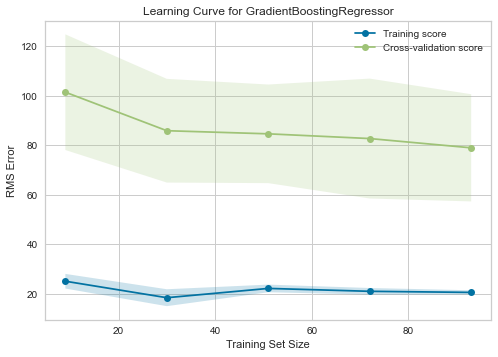

In [105]:
cv = KFold(n_splits=10, random_state=1)
y_actual = []
predict = []
X, X_Test, y, y_Test = train_test_split(X, y, test_size=0.2, random_state=42)
train_size,train_score,test_score=learning_curve(mod,X,y,cv=cv,scoring='neg_root_mean_squared_error')
train_mean=-np.mean(train_score,axis=1)
train_std=-np.std(train_score,axis=1)
test_mean=-np.mean(test_score,axis=1)
test_std=-np.std(test_score,axis=1)
    
plt.figure()
plt.subplots(1)
plt.plot(train_size,train_mean, 'o-', color="b",label="Training score")
plt.plot(train_size, test_mean, 'o-', color="g",label="Cross-validation score")
plt.fill_between(train_size, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(train_size, test_mean - test_std, test_mean + test_std, alpha=0.2)
plt.title("Learning Curve for {}".format(str(mod).split('(')[0]))
plt.xlabel("Training Set Size")
plt.ylabel("RMS Error")
plt.legend(loc="best")
plt.show()

In [106]:
X = X.to_numpy()
y = y.to_numpy()
y_Test=y_Test.to_numpy()
kf=cv

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    HBM_Train = mod.fit(X_train, y_train)
    HBM_Test = HBM_Train.predict(X_test)
    print('Root Mean squared error: %f'
          % mean_squared_error(y_test, HBM_Test,squared=False))
    print()

ytestunk=HBM_Train.predict(X_Test)
err=np.zeros(len(ytestunk))
for u in range (0,len(ytestunk)):
    err[u]=np.sqrt((y_Test[u]-ytestunk[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print("error COV--->{}  error mean --->{}  error std --->{}".format(cov_r,abs(a.loc['mean']),a.loc['std']))

Root Mean squared error: 74.058605

Root Mean squared error: 12.005161

Root Mean squared error: 21.332764

Root Mean squared error: 26.713091

Root Mean squared error: 22.251308

Root Mean squared error: 12.002556

Root Mean squared error: 27.329310

Root Mean squared error: 8.717953

Root Mean squared error: 17.552738

Root Mean squared error: 23.301062

error COV--->0    0.856899
dtype: float64  error mean --->0    76.331085
Name: mean, dtype: float64  error std --->0    65.408006
Name: std, dtype: float64


# Grid search

In [107]:
# # Hyperparameter values of GradientBoost to input to the GridSearchCV

n_estimators = [100,110,120]
max_features = ['auto','sqrt',0.5]
max_depth = [30,35,40]
min_samples_split = [0.01,0.02]
min_samples_leaf = [0.05,0.06,0.07,0.08]
criterion=['mse','mae']
warm_start=[True,False]
learning_rate = [0.01,0.02,0.03]
subsample = [0.5,1.0]

random_grid = {"learning_rate"   : learning_rate,
             "subsample"        : subsample,
             "n_estimators": n_estimators,
             'max_depth'        : max_depth,
            "criterion": criterion,
            "warm_start":warm_start,
             "max_features"     : max_features,
             "min_samples_split": min_samples_split,
             "min_samples_leaf" : min_samples_leaf
             }

In [14]:
Data=pd.read_csv('Result_dataset_130.csv')
Head = Data.columns[14]
Chest_deflection =  Data.columns[13]
Head_acceleration = Data.columns[15]
neck_force = Data.columns[16]
features = Data.columns[0:13]
X=Data[features]
y=Data[Chest_deflection]

In [109]:
rf = GradientBoostingRegressor()
reg = GridSearchCV(rf,param_grid = random_grid ,cv = cv, return_train_score=True,scoring="neg_root_mean_squared_error", verbose=2, n_jobs = -1)
reg.fit(X,y)

Fitting 10 folds for each of 5184 candidates, totalling 51840 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 682 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 1248 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done 1978 tasks      | elapsed:   28.9s
[Parallel(n_jobs=-1)]: Done 2868 tasks      | elapsed:   41.4s
[Parallel(n_jobs=-1)]: Done 3922 tasks      | elapsed:   57.3s
[Parallel(n_jobs=-1)]: Done 5136 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 6514 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 8052 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 9754 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 11616 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 13642 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 15828 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 18178 tasks   

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=False),
             estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'],
                         'learning_rate': [0.01, 0.02, 0.03],
                         'max_depth': [30, 35, 40],
                         'max_features': ['auto', 'sqrt', 0.5],
                         'min_samples_leaf': [0.05, 0.06, 0.07, 0.08],
                         'min_samples_split': [0.01, 0.02],
                         'n_estimators': [100, 110, 120],
                         'subsample': [0.5, 1.0], 'warm_start': [True, False]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=2)

In [110]:
reg.best_params_

{'criterion': 'mae',
 'learning_rate': 0.03,
 'max_depth': 30,
 'max_features': 0.5,
 'min_samples_leaf': 0.06,
 'min_samples_split': 0.02,
 'n_estimators': 120,
 'subsample': 1.0,
 'warm_start': False}

In [4]:
Data=pd.read_csv('Result_dataset_130.csv')

Head = Data.columns[14]
Chest_deflection =  Data.columns[13]
Head_acceleration = Data.columns[15]
neck_force = Data.columns[16]

X=Data[Data.columns[0:13]]
y=Data[Head]

In [5]:
#Chest deflection:
# mod=GradientBoostingRegressor(subsample=0.5,n_estimators=100,min_samples_split=0.1,min_samples_leaf=0.07,max_features='auto',max_depth=10,learning_rate=0.09,criterion= 'mse',warm_start=True)#--0.71
# #Neck
# mod=GradientBoostingRegressor(max_depth=4, min_samples_leaf=0.06, min_samples_split=0.1,criterion='mse',subsample=0.5,max_features=0.5,warm_start=True,n_estimators=80,learning_rate=0.08)
# # Head acc
# mod=GradientBoostingRegressor(max_depth=30, min_samples_leaf=0.06, min_samples_split=0.1,criterion='mse',max_features=0.5,n_estimators=80,learning_rate=0.03, warm_start=False)

## HIC
mod=GradientBoostingRegressor(max_depth=2, min_samples_leaf=0.06, min_samples_split=0.02,criterion='mae',max_features=0.5,n_estimators=120,learning_rate=0.03, warm_start=False)


In [10]:
Data=pd.read_csv('Result_dataset_130.csv')

Head = Data.columns[14]
Chest_deflection =  Data.columns[13]
Head_acceleration = Data.columns[15]
neck_force = Data.columns[16]

X=Data[Data.columns[0:13]]
y=Data[Head]
cv = KFold(n_splits=10, random_state=1)
y_actual = []
predict = []
# X, X_Test, y, y_Test = train_test_split(X, y, test_size=0.2, random_state=1)
kf=cv
# plt.figure()
# ind = np.arange(len(y)) 
# plt.scatter(ind,y, color="b",label="Training")
# ind = np.arange(len(y_Test))
# plt.scatter(ind,y_Test, color="r",label="Test")
# plt.title("Unseen")
# plt.xlabel("Actual")
# plt.ylabel("pred")
# plt.legend(loc="best")
# plt.show()

C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [11]:
# cv = KFold(n_splits=10, random_state=1)
# y_actual = []
# predict = []
# X, X_Test, y, y_Test = train_test_split(X, y, test_size=0.2, random_state=1)
train_size,train_score,test_score=learning_curve(mod,X,y,cv=cv,scoring='neg_mean_absolute_error')


<Figure size 576x396 with 0 Axes>

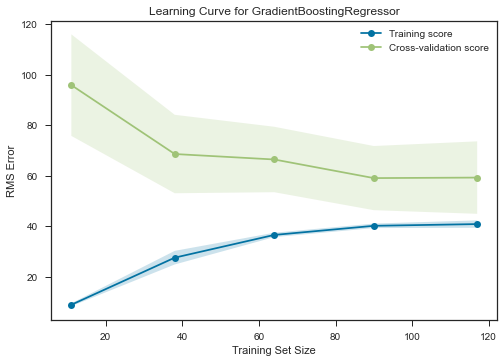

In [12]:
kf=cv
train_mean=-np.mean(train_score,axis=1)
train_std=-np.std(train_score,axis=1)
test_mean=-np.mean(test_score,axis=1)
test_std=-np.std(test_score,axis=1)
    
plt.figure()
plt.subplots(1)
plt.plot(train_size,train_mean, 'o-', color="b",label="Training score")
plt.plot(train_size, test_mean, 'o-', color="g",label="Cross-validation score")
plt.fill_between(train_size, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(train_size, test_mean - test_std, test_mean + test_std, alpha=0.2)
plt.title("Learning Curve for {}".format(str(mod).split('(')[0]))
plt.xlabel("Training Set Size")
plt.ylabel("RMS Error")
plt.legend(loc="best")
plt.show()

In [25]:
pd.DataFrame(test_mean)

,0
0,0.144837
1,0.125975
2,0.118537
3,0.104373
4,0.109282


<Figure size 576x396 with 0 Axes>

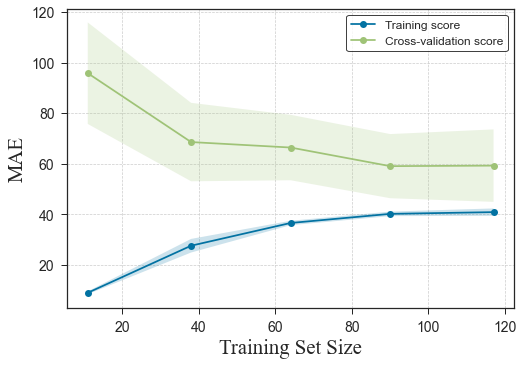

In [14]:
train_mean=-np.mean(train_score,axis=1)
train_std=-np.std(train_score,axis=1)
test_mean=-np.mean(test_score,axis=1)
test_std=-np.std(test_score,axis=1)
    
plt.figure()
plt.style.use('seaborn-ticks')
csfont = {'fontname':'Times New Roman'}
plt.subplots(1)
plt.plot(train_size,train_mean, 'o-', color="b",label="Training score")
plt.plot(train_size, test_mean, 'o-', color="g",label="Cross-validation score")
plt.fill_between(train_size, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(train_size, test_mean - test_std, test_mean + test_std, alpha=0.2)
# plt.title("Learning Curve for {}".format(str(mod).split('(')[0]))
plt.xlabel("Training Set Size", fontsize='xx-large',**csfont)
plt.ylabel("MAE", fontsize='xx-large',**csfont)
leg = plt.legend(frameon=True,loc='best',prop={'size': 12})
leg.get_frame().set_linewidth(1)
leg.get_frame().set_edgecolor('k')
plt.grid(linestyle = '--', linewidth = 0.7)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.savefig('R_hic_LC', bbox_inches="tight")
plt.show()

<Figure size 576x396 with 0 Axes>

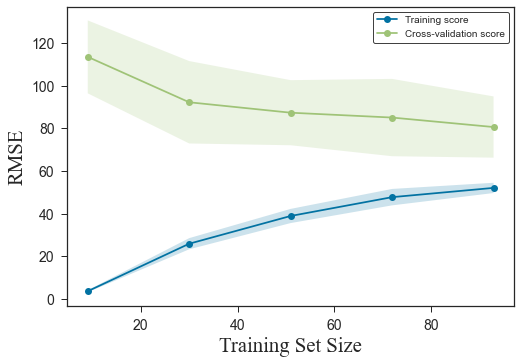

In [11]:
# plt.figure()
# plt.style.use('seaborn-ticks')
# csfont = {'fontname':'Times New Roman'}
# plt.subplots(1)
# plt.plot(train_size,train_mean, 'o-', color="b",label="Training score")
# plt.plot(train_size, test_mean, 'o-', color="g",label="Cross-validation score")
# plt.fill_between(train_size, train_mean - train_std, train_mean + train_std, alpha=0.2)
# plt.fill_between(train_size, test_mean - test_std, test_mean + test_std, alpha=0.2)
# # plt.title("Learning Curve for {}".format(str(mod).split('(')[0]))
# plt.xlabel("Training Set Size", fontsize='xx-large',**csfont)
# plt.ylabel("RMSE", fontsize='xx-large',**csfont)
# leg = plt.legend(frameon=True,loc='best')
# leg.get_frame().set_linewidth(1)
# leg.get_frame().set_edgecolor('k')
# plt.grid(False)
# plt.yticks(fontsize=14)
# plt.xticks(fontsize=14)
# # plt.savefig('repimg/hicgrad_130_LT', bbox_inches="tight")
# plt.show()

## Unknown data set

In [15]:
X, X_Test, y, y_Test = train_test_split(X, y, test_size=0.2, random_state=1)
# 

In [16]:
X = X.to_numpy()
y = y.to_numpy()
y_Test=y_Test.to_numpy()
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    HBM_Train = mod.fit(X_train, y_train)
    HBM_Test = HBM_Train.predict(X_test)
    print('Root Mean squared error: %f'
          % mean_squared_error(y_test, HBM_Test,squared=False))
    print()

ytestunk=HBM_Train.predict(X_Test)
err=np.zeros(len(ytestunk))
for u in range (0,len(ytestunk)):
    err[u]=np.sqrt((y_Test[u]-ytestunk[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print("error COV--->{}  error mean --->{}  error std --->{}".format(cov_r,abs(a.loc['mean']),a.loc['std']))

Root Mean squared error: 66.860499

Root Mean squared error: 98.387488

Root Mean squared error: 91.632879

Root Mean squared error: 52.860979

Root Mean squared error: 81.589909

Root Mean squared error: 110.184268

Root Mean squared error: 104.644445

Root Mean squared error: 98.803763

Root Mean squared error: 63.999259

Root Mean squared error: 74.265315

error COV--->0    0.894948
dtype: float64  error mean --->0    48.440057
Name: mean, dtype: float64  error std --->0    43.351345
Name: std, dtype: float64


## Training set

In [17]:
ytr=HBM_Train.predict(X)
err=np.zeros(len(ytr))
for u in range (0,len(ytr)):
    err[u]=np.sqrt((y[u]-ytr[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print("error COV--->{}  error mean --->{}  error std --->{}".format(cov_r,abs(a.loc['mean']),a.loc['std']))

error COV--->0    1.189911
dtype: float64  error mean --->0    38.989329
Name: mean, dtype: float64  error std --->0    46.393849
Name: std, dtype: float64


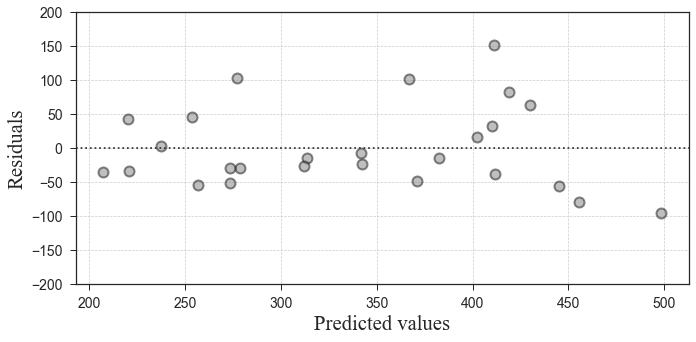

In [20]:
plt.figure(figsize=(11, 5))

plt.style.use('seaborn-ticks')
csfont = {'fontname':'Times New Roman'}
# a=sns.residplot(y=abs(y), x=abs(ytr),label='Train')
r=sns.residplot(y=abs(y_Test), x=abs(ytestunk),label='Test',scatter_kws={"s": 100,"facecolor": 'grey',"linewidth":2,"edgecolors": 'k',"alpha":0.5})
plt.grid( linestyle='--')
# plt.title('Residuals plot ', fontsize='large',**csfont)
plt.xlabel('Predicted values', fontsize='xx-large',**csfont)
plt.ylabel('Residuals', fontsize='xx-large',**csfont)
plt.rcParams["font.family"] = "Times New Roman"

# leg = plt.legend(frameon=True,loc='best',prop={'size': 14})
leg.get_frame().set_linewidth(1)
leg.get_frame().set_edgecolor('k')
plt.grid(linestyle = '--', linewidth = 0.7)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
# plt.xlim([20,50])
plt.ylim([-200,200])
plt.savefig('hic_R_res', bbox_inches="tight")
plt.show()

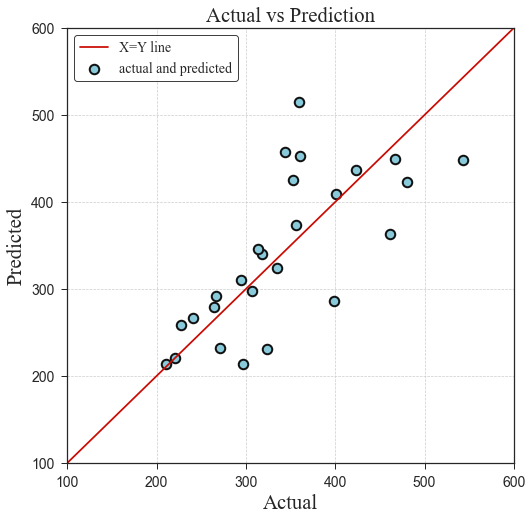

In [13]:

plt.figure(figsize=(8, 8))

plt.style.use('seaborn-ticks')
csfont = {'fontname':'Times New Roman'}
plt.scatter(y_Test,ytestunk, marker = 'o', linewidths = 2, edgecolors = 'k',s=90,facecolors='C5',label='actual and predicted')
plt.plot([100,600],[100,600],color='r',label='X=Y line')
plt.grid(False)
plt.title('Actual vs Prediction', fontsize='xx-large',**csfont)
plt.xlabel('Actual', fontsize='xx-large',**csfont)
plt.ylabel('Predicted', fontsize='xx-large',**csfont)
plt.rcParams["font.family"] = "Times New Roman"

leg = plt.legend(frameon=True,loc='best',prop={'size': 14})
leg.get_frame().set_linewidth(1)
leg.get_frame().set_edgecolor('k')
plt.grid(linestyle = '--', linewidth = 0.7)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlim([100,600])
plt.ylim([100,600])
# plt.savefig('dmax_grad', bbox_inches="tight")
plt.show()


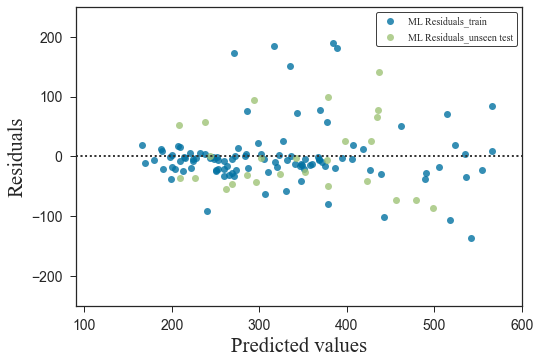

In [20]:
plt.figure()

plt.style.use('seaborn-ticks')
csfont = {'fontname':'Times New Roman'}
a=sns.residplot(y=abs(y), x=abs(ytr),label='ML Residuals_train')
r=sns.residplot(y=abs(y_Test), x=abs(ytestunk),label='ML Residuals_unseen test')
plt.grid( linestyle='--')
# plt.title('Residuals plot ', fontsize='large',**csfont)
plt.xlabel('Predicted values', fontsize='xx-large',**csfont)
plt.ylabel('Residuals', fontsize='xx-large',**csfont)
plt.rcParams["font.family"] = "Times New Roman"

leg = plt.legend(frameon=True,loc='best')
leg.get_frame().set_linewidth(1)
leg.get_frame().set_edgecolor('k')
plt.grid(False)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlim([90,600])
plt.ylim([-250,250])
# plt.savefig('repimg/hic_130_resT', bbox_inches="tight")
plt.show()

In [21]:
df_tosave=pd.DataFrame(ytestunk,columns = ['Unseen predicted'])
df_tosave['test actual']=pd.DataFrame(y_Test)
df_tosave.to_csv('repimg/Gts.csv')

df_trn=pd.DataFrame(ytr,columns = ['train predicted'])
df_trn['actual']=pd.DataFrame(y)
df_trn.to_csv('repimg/Gtr.csv')

In [35]:
# define model evaluation method
cv = KFold(n_splits=10,random_state=1)
# evaluate model
scores = cross_val_score(mod, X, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)

scores = abs(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()))

Mean MAE: 0.137 (0.043)


In [8]:
Data=pd.read_csv('7_paramres.csv',index_col=None)
nam=Data.describe()
sd=nam.columns[13]
print(sd)

Chest Deflection [mm]


In [9]:
act=abs(nam.loc['mean'][sd])
new=abs(Data[sd].values)

C:\Users\ypyas\anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:214: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


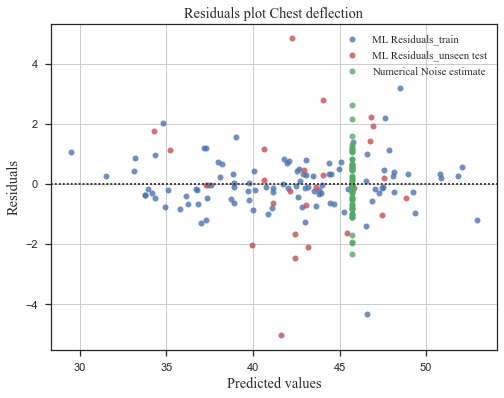

In [12]:
mean=abs(a.loc['mean'])
std=a.loc['std']
csfont = {'fontname':'Times New Roman'}
plt.figure(figsize=(8, 6))

sns.set_theme(style="ticks")
sns.residplot(x=abs(y), y=abs(ytr),color="b",label='ML Residuals_train')
sns.residplot(x=abs(y_Test), y=abs(ytestunk),color="r",label='ML Residuals_unseen test')
# plt.errorbar(mean, 0, yerr=std, fmt='.k');
# sns.residplot(x=np.ones(50)*ass.loc['mean']['HIC 15'], y=df['HIC 15'].to_numpy(), lowess=True, color="g",label='Numerical noise')
sns.residplot(x=np.ones(len(new))*new.mean(), y=new, lowess=True, color="g",label='Numerical Noise estimate')

plt.title('Residuals plot Chest deflection', fontsize='large',**csfont)
plt.xlabel('Predicted values', fontsize='large',**csfont)
plt.ylabel('Residuals', fontsize='large',**csfont)
plt.rcParams["font.family"] = "Times New Roman"
plt.legend()
plt.grid()
plt.savefig('resk1.png')
plt.show()